In [2]:
#Name : Vishal Chalia

#Introduction

Organizational turnover may cost organizations a lot in terms of finances and operations. Understanding attririon patterns allows HR departments to know why people quit, put at risk groups in focus, and develope retention strategies.

Data provided includes employee level information including numerous features like demographics, job position, salary, work experience, and if employee has left the company or not.

Through the analysis of these records we will be able to reveal the trends, and the major causes of attrition so that businesses can retain a stable and engaged workforce.

#Business Context

One of the most acute Human Resource (HR) management issues is employee attrition or loss of employees in an organization. High turnover can lead to:

- Increase in recruitment, onboarding, and training costs.
- Loss of experienced talent and organizational knowledge
- Can cause dirsuptions in project delivery, team morale and balance.

The given dataset contains detailed information on the employees, such as demographics (age, gender, education), compensation (salary, job level, income), work realted variables (job role, years at company, overtime), and the most crucial target variable, Attrition, which is the vairable that represents the information on whether an employee has left the company or not.

Through the analysis of the said data, HR departments will be able to:

- Determine which factors are the most relevant to employee attririon.
- Identify departmental, job role and demographic trends.
- Create evidence-based retetion measures.
- Enhance total employee satisfaction and involvement.

The end goal is the convert unprocessed HR data into actionable insights that can assist in reducing the rate of turnover and enhancing the stabilty of the work force.


#Data Source
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

#Business Questions
Q1: How does attrition vary by department?

Q2: Does working over time makes an impact on attrition rate?

Q3: What is the correlation between Age, Monthly Income, Experience, Distance from home with Attrition Rate?

Q4: How does Years at company and age group differ with each other in terms of attrition?

Q5: How does education and business travel differ from each other in terms of attrition rate?

Q6: What is the average monthly income and job satisfaction score for the employees who left against who stayed?


#Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset and Exploration

In [4]:
df_org = pd.read_csv(
    '/content/drive/MyDrive/AI Datasets/(Final)_HR-Employee-Attrition.csv')

print(df_org.shape)
display(df_org.head())
print('count of nan',df_org.isna().sum().sum())

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1.0,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


count of nan 669


#Data Cleaning

In [5]:
df = df_org.copy()

df = df.drop_duplicates()
numcols = df.select_dtypes(include = ['int64', 'float64']).columns
catcols = df.select_dtypes(include='object').columns

df[numcols] = df[numcols].fillna(df[numcols].mean())
df['Age'] = df['Age'].astype('int')

hr = 0.05*len(df)

for cols in catcols:
  missing = df[cols].isna().sum()
  if missing > 0:
    if missing <= hr:
      df[cols] = df[cols].fillna(df[cols].mode()[0])
    else:
      df[cols] = df[cols].fillna('unknown')

print('nan count after cleaning',df.isna().sum().sum())
display(df.isna().sum())
display(df.head(10))

nan count after cleaning 0


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1.0,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
5,32,No,Travel_Frequently,1005.0,Research & Development,2.0,2.0,Life Sciences,1.0,8.0,...,3.0,80.0,0.0,8.0,2.0,2.0,7.0,7.0,3.0,6.0
6,59,No,Travel_Rarely,1324.0,Research & Development,3.0,3.0,Medical,1.0,10.0,...,1.0,80.0,3.0,12.0,3.0,2.0,1.0,0.0,0.0,0.0
7,30,No,Travel_Rarely,1358.0,Research & Development,24.0,1.0,Life Sciences,1.0,11.0,...,2.0,80.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0
8,36,No,Travel_Frequently,216.0,Research & Development,23.0,3.0,Life Sciences,1.0,12.0,...,2.0,80.0,0.0,10.0,2.0,3.0,9.0,7.0,1.0,8.0
9,36,No,Travel_Rarely,1299.0,Research & Development,27.0,3.0,Medical,1.0,13.0,...,2.0,80.0,2.0,17.0,3.0,2.0,7.0,7.0,7.0,7.0


During the data cleaning dupliated were removed to avoid any double figures, and also missing values were handled with numeric columns filled with the mean, through this the size of the dataset was kept intact, mean was used as most the data is numeric and barely had any gaps and was continous.

While categorial columns were filled with mode and if <5% data is missing otherwise 'Unknown' was used.

#Feature Engineering

In [6]:
#feature eng
df ['AF'] = df['Attrition'].map({"Yes": 1, "No": 0})

yearbins = [0, 2, 5, 10, 20, np.inf]
year_labels = ['0-2', '3-5', '6-10', '11-20', '21-40']
df['yearsgp'] = pd.cut(df['YearsAtCompany'],
                       bins=yearbins,
                       labels= year_labels,
                       include_lowest=True)

agebins = [18, 25, 34, 44, 54, np.inf]
age_labels = ['18-25', '26-34', '35-44', '45-54', '55+']
df['agegp'] = pd.cut(df[
    'Age'], bins = agebins,
            labels = age_labels,
            include_lowest= True)

print('count of nan',df.isna().sum().sum())
df.head()

count of nan 0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AF,yearsgp,agegp
0,41,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,...,8.0,0.0,1.0,6.0,4.0,0.0,5.0,1,6-10,35-44
1,49,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,...,10.0,3.0,3.0,10.0,7.0,1.0,7.0,0,6-10,45-54
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1.0,4.0,...,7.0,3.0,3.0,0.0,0.0,0.0,0.0,1,0-2,35-44
3,33,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,...,8.0,3.0,3.0,8.0,7.0,3.0,0.0,0,6-10,26-34
4,27,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,6.0,3.0,3.0,2.0,2.0,2.0,2.0,0,0-2,26-34


Attriton column was also converted to binary (AF: 1 = Left, 0 = Satyed) through this statistical calculations were done easily.


Also bins were created for tenure and age for better classification and visual analysis.

#EDA

Unique count of features used for EDA.

In [7]:
colsf = [
    'yearsgp',
    'agegp',
    'EducationField',
    'BusinessTravel',
    'Department',
    'JobRole'
]

for col in colsf:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: yearsgp
['6-10', '0-2', '3-5', '21-40', '11-20']
Categories (5, object): ['0-2' < '3-5' < '6-10' < '11-20' < '21-40']

Column: agegp
['35-44', '45-54', '26-34', '55+', '18-25']
Categories (5, object): ['18-25' < '26-34' < '35-44' < '45-54' < '55+']

Column: EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Column: BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column: Department
['Sales' 'Research & Development' 'Human Resources']

Column: JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


Q1: How does attrition vary by department?

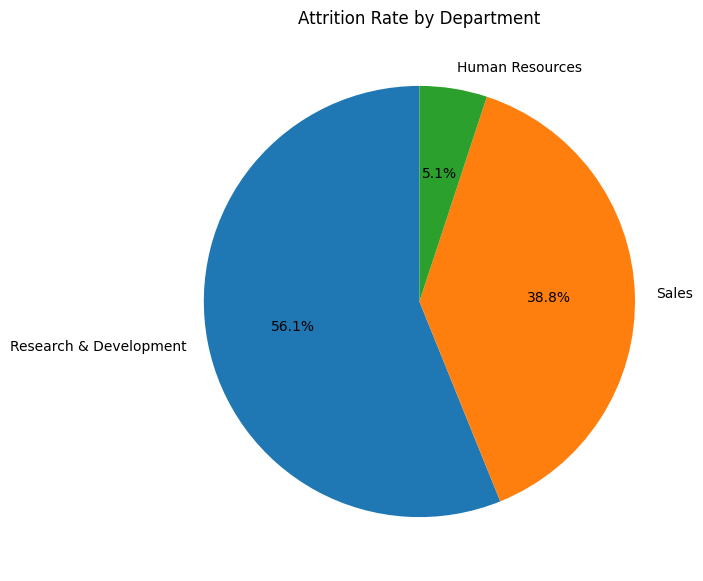

In [8]:
dept_counts = df[df['AF']==1] ['Department'].value_counts()

#plotting
plt.figure(figsize= (7,7))
plt.pie(dept_counts, labels = dept_counts.index, autopct=
        '%1.1f%%', startangle= 90)
plt.title('Attrition Rate by Department')
plt.show()

The chart demonstrates how employees who left were distributed in departments. The majority of attrition is due to Research and Development (56.1%), and sales (38.8%), with Human Resources (5.1%), bringing the least contribution. This indicates the proportion of each department , including the turnover trends, R&D is the largest department in termns of workforce hence it is expected to occupy the largest portion of exits whereas the HR department has the least number of exits. These numbers should be compared with the number of heads of departments to determine whether the attrition rate is high or low, althoufh this perspective makes it obvious where the bulk of the departures are taking their sources.

Q2: Does working over time makes an impact on attrition rate?

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

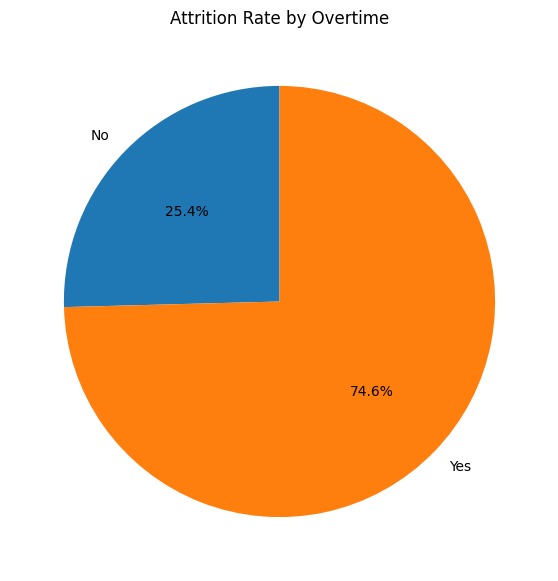

In [9]:
ot= df.groupby('OverTime', observed= True)['AF'].mean().reset_index()
ot['AttritionRate'] = ot['AF']*100

#plotting
plt.figure(figsize= (7,7))
plt.pie(ot['AttritionRate'], labels = ot['OverTime'], autopct=
        '%1.1f%%', startangle= 90)
plt.title('Attrition Rate by Overtime')
plt

The comparison was made on the distribution of attrition between overtime and the non-overtime employees. The chart revelas that the majority of the employees that have left were those working over time and only a small percentage were employees who were not assigned any overtime responsibilities. This imploes that overtime is a major consideration in voluntary exits. Despite the fact that the chart indicated the percentage ratio of departures and not the turnover rate per se, it shows that the problem of resigning is concentrated among overtime workers. HR must analyze the rate of overtime, workload, and compensation policies to restrict burnout and enhance retention.

Q3: What is the correlation between Age, Monthly Income, Experience, Distance from home with Attrition Rate?

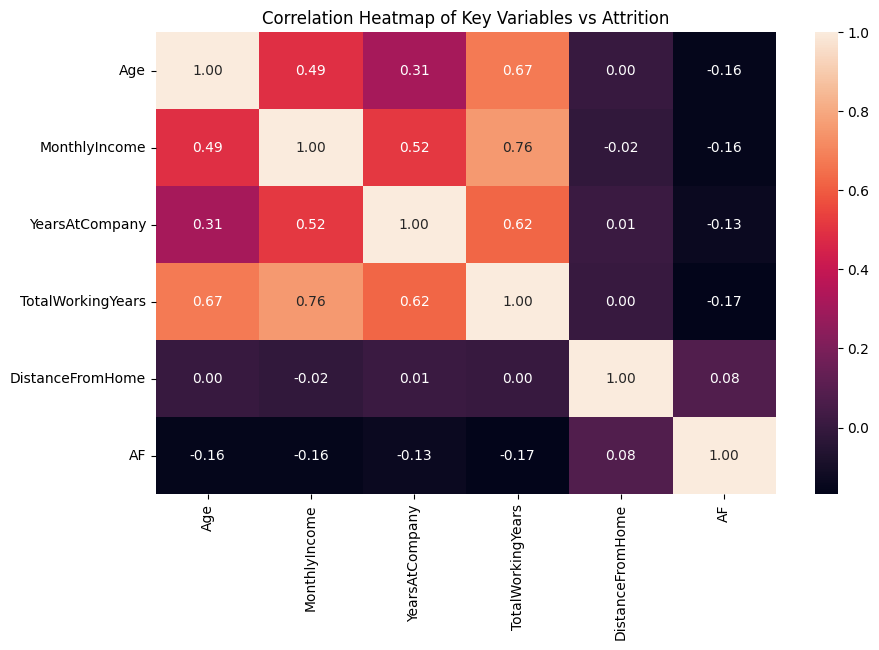

In [10]:
Icols = ['Age', 'MonthlyIncome', 'YearsAtCompany',
         'TotalWorkingYears', 'DistanceFromHome', 'AF']

mat = df[Icols].corr()

#plotting
plt.figure (figsize= (10,6))
sns.heatmap(mat, annot = True, fmt = '.2f', cbar = True)
plt.title ('Correlation Heatmap of Key Variables vs Attrition')
plt.show()

The correlation analysis of Age, Monthly Income, Total Working Years, Distance from Home, and Attrition indicates that the older the employees are the higher their monthly salaries, the more experience they have, the lower the chances of leaving is, whereas the longer they commute, the higher the attrition probability. The negative realtionships of age, income and experience show that stability increases with maturity, higher remuneration and more years of experience, but weak positive relationship with distance shows that the impact of commuting is not ver significant. On the whole, the attrition rates are the highest in the younger, less experienced employees who earn less money, which emphasizes the necessity of considering the needs of employees at the begining of their careers, ensuring salary growth, and offering felxible working options to those who have to travel long distances.

Q4: How does Years at company and age group differ with each other in terms of attrition?

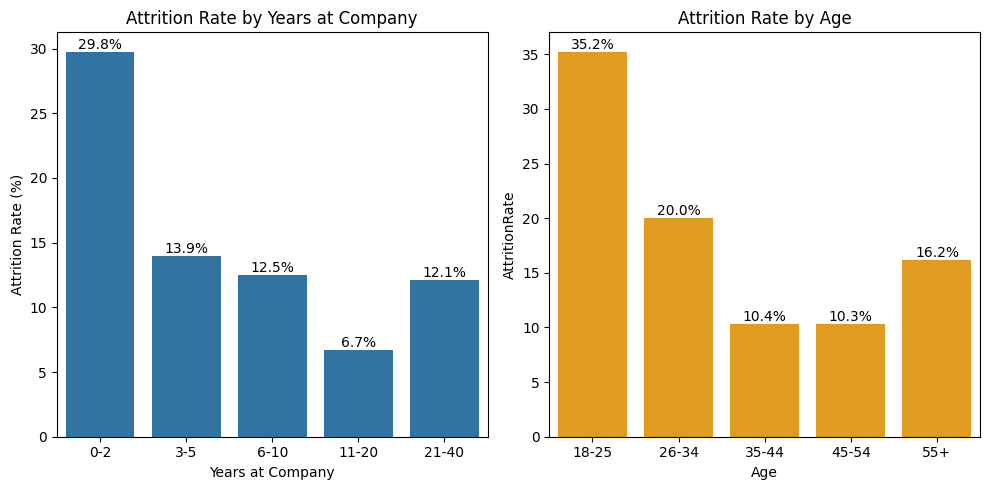

In [11]:
attr_years = df.groupby('yearsgp', as_index=False, observed= True)['AF'].mean()
attr_years['AttritionRate'] = attr_years['AF']*100

attr_age = df.groupby('agegp', as_index=False, observed= True)['AF'].mean()
attr_age['AttritionRate'] = attr_age['AF']*100

#plotting
fig, axes= plt.subplots (1,2, figsize = (10,5))
sns.barplot(data = attr_years, x = 'yearsgp', y = 'AttritionRate', ax = axes[0])
axes[0].set_title('Attrition Rate by Years at Company')
axes[0].set_xlabel('Years at Company')
axes[0].set_ylabel('Attrition Rate (%)')

sns.barplot(data = attr_age, x = 'agegp', y = 'AttritionRate', ax = axes[
    1], color= 'orange')
axes[1].set_title('Attrition Rate by Age')
axes[1].set_xlabel('Age')
axes[0].set_ylabel('Attrition Rate (%)')

for container in axes[0].containers:
    axes[0].bar_label(container, fmt= '%.1f%%')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt= '%.1f%%')

plt.tight_layout()
plt.show()

The cross-analysis of Years at Company and Age Group and Attrition show that the most high turnover is recorded by employees that are young and who have been with the company less than two years. Attrition rate decrease with both age and firm service, with the mid-career workers (33-44), and employees who have over 5 years of work experience being significantly less risky. The most stable staff are those with long tenure who are above 45 years with minimal resignation cases. This trend indicates that the retention programs must operate on employees in their early.career stages especially first-year emplyees by intensifying onboarding, career development and mentoring programsto enable the employees remain engaged and develop within the organization.


Q5: How does education and business travel differ from each other in terms of attrition rate?

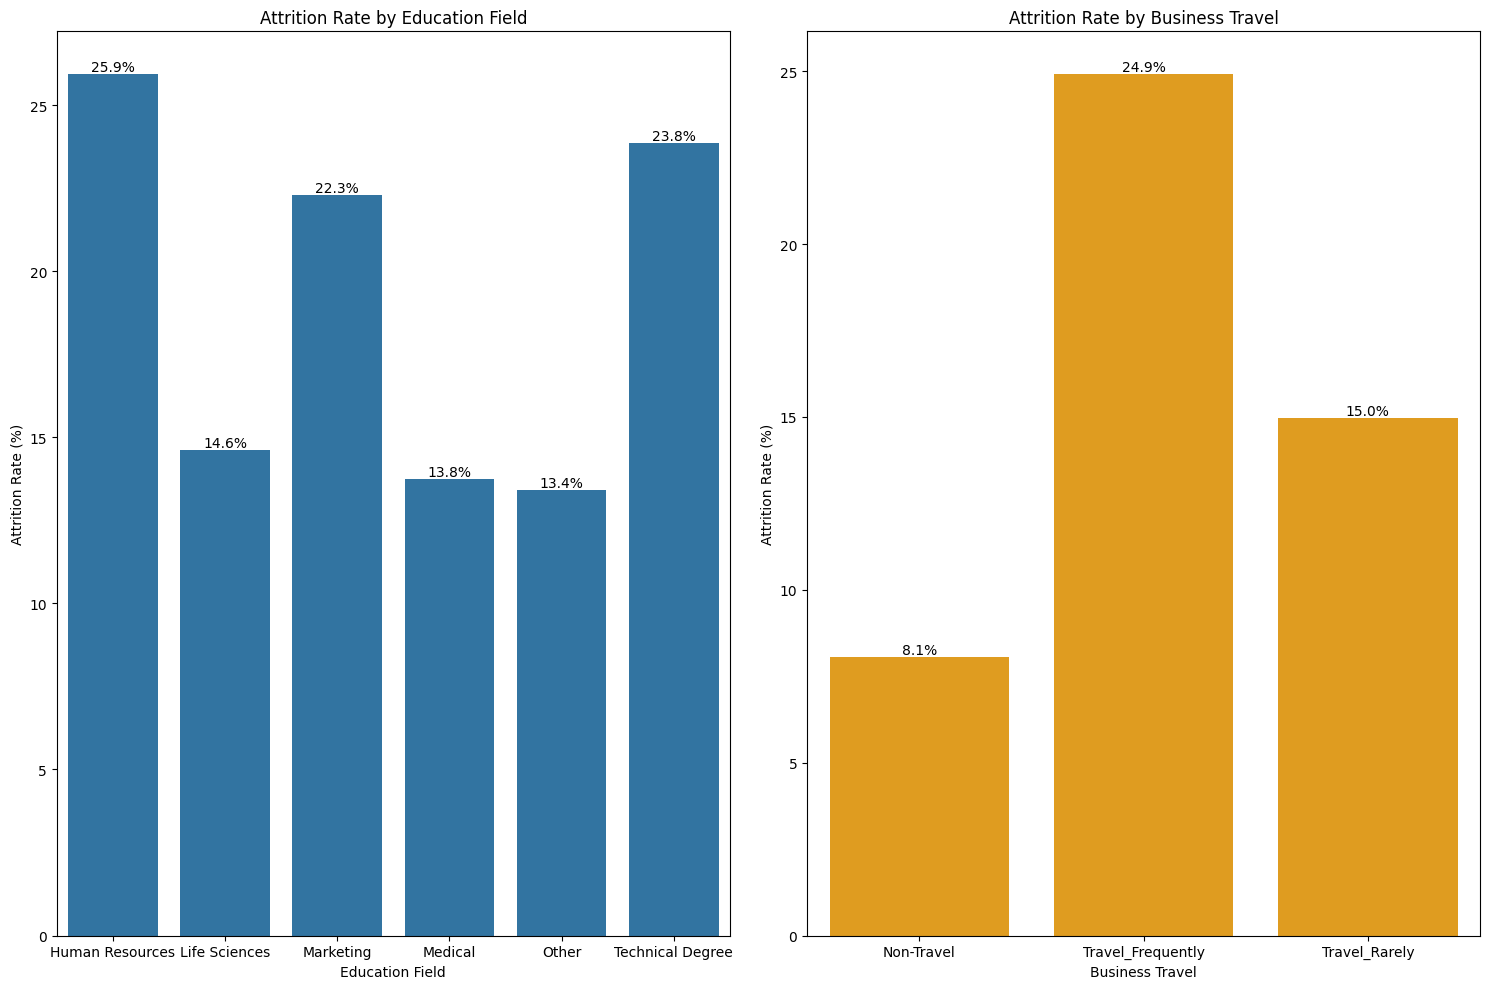

In [12]:
edu_turnover = df.groupby('EducationField', observed= True)[
    'AF'].mean().reset_index()
edu_turnover['AttritionRate'] = edu_turnover['AF']*100

travel_turnover = df.groupby('BusinessTravel', observed= True)[
    'AF'].mean().reset_index()
travel_turnover['AttritionRate'] = travel_turnover['AF']*100


#plotting
fig, axes= plt.subplots (1,2, figsize = (15,10))
sns.barplot(data = edu_turnover, x =
            'EducationField', y = 'AttritionRate', ax = axes[0])
axes[0].set_title('Attrition Rate by Education Field')
axes[0].set_xlabel('Education Field')
axes[0].set_ylabel('Attrition Rate (%)')

sns.barplot(data = travel_turnover, x =
            'BusinessTravel', y = 'AttritionRate', ax = axes[
                1], color= 'orange')
axes[1].set_title('Attrition Rate by Business Travel')
axes[1].set_xlabel('Business Travel')
axes[1].set_ylabel('Attrition Rate (%)')

for container in axes[0].containers:
    axes[0].bar_label(container, fmt= '%.1f%%')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt= '%.1f%%')

plt.tight_layout()
plt.show()

Attriton is evidently linked to the educaton field of employees and the frequency of their business travels. The highest turnover is registered in Human Resources, Technical Degrees and Marketing. Frequent travellers are at the highest risk of attriton (Uot to 25%), and non travellers (8%). Such findings imply that retention energies should be targeted at the high-churn academic departments of a company and at the employees who have a high travel load.

Q6: What is the average monthly income and job satisfaction score for the employees who left against who stayed?

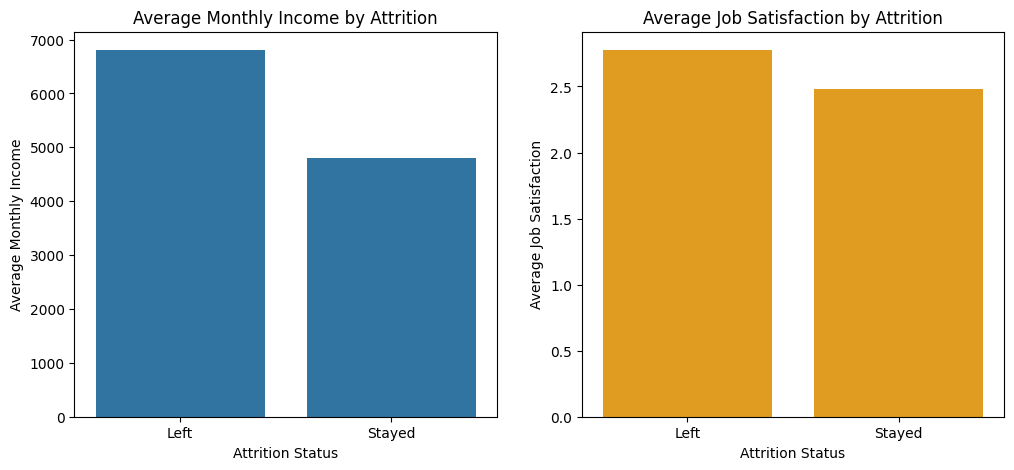

In [13]:
avg_values = df.groupby('AF', observed= True)[
    ['MonthlyIncome', 'JobSatisfaction']].mean().reset_index()

avg_values['AttritionStatus'] = df['AF'].map({0: 'Stayed', 1: 'Left'})

fig, axes= plt.subplots (1,2, figsize = (12,5))

sns.barplot(data=avg_values, x='AttritionStatus', y='MonthlyIncome',
            ax=axes[0])
axes[0].set_title('Average Monthly Income by Attrition')
axes[0].set_xlabel('Attrition Status')
axes[0].set_ylabel('Average Monthly Income')

sns.barplot(data=avg_values, x='AttritionStatus', y='JobSatisfaction',
            ax=axes[1], color='orange')
axes[1].set_title('Average Job Satisfaction by Attrition')
axes[1].set_xlabel('Attrition Status')
axes[1].set_ylabel('Average Job Satisfaction')
plt.show()

The average monthly income and job satisfactoin of employees who left and those who stayed is quite noticeable in the comparison. The avarage incomes of the staff who quit were approx 6,900 USD, and the ones who remained were about 4,800 USD. They also scored a little higher (2.8) in their job satisfaction compared to the remaining (2.5). These findings indicate that higher payed employees who are moderatly staisfied can still leave the company - most probably in search of a better life or balance between work and home, whereas less paid employees who are consistently satisfied tend to stay. The retention programs must focus on a combination of compensation systems and engagement approaches that can gurantee that salary increase is accompained with career and job satisfaction.

#Conclusion

The HR attrition analysis showed that several factors are connected adn thus turnover:

- **Tennuer and Age:** Employess with less than two years of experience and the younger employees below age 25 have the highest chances of quitting.

- **Compensation Satisfaction:** Leavers are also likely to receive higher compensation but moderate levels of satisfaction indicating that it is not just the compensation that will hold them in place.

- **Department and Role:** The Research and Deveplopment and Sales have let in the number of departures, and Human Resources have small number of exits.

- **Overtime:** A significant proportion of the attrition is attributed to overtime working by the staff, which implies that workers are under work pressure.

- **Education & Travel:** Churn is higher in the Human Resources, Technical degrees and Marketing fields as well as those employees who travel regularly.

- **Distance and Experience:** Experienced workers are a little more likely to be the part of the attrition with longer commutes; with longer work experience, they are less likely to be in the group.

In general, young, short-term of employment, those with high travel requirement, high overtime requirement, and parts of the education groups habe the highest atrrition rates. The use of retention should be oriented at onboarding and career support of early-career employees, revision of the overtime and travel regulations, enhancing the involvement of the staff in high-turnover units, and applying the experience of low-turnover on the implementation of successful strategies.

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")
